<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20II%20%3A%20Business%20Applications/Chapter%2015%3A%20Manufacturing%20Analytics/15_2_Statistical_Quality_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Manufacturing Analytics**
## Statistical Quality Control

## Statistical Process Control

Statistical process control is a tool that aims to adhere to standards by taking into account the compliance of production with predetermined quality specifications, is used to minimize the production of non-conforming products, and provides decision-making based on data. The tools that are widely used in solving quality problems and especially used for process control can be listed as follows:

*   Histograms
*   Pareto charts
*   Cause-and-effect diagrams
*   Defect-concentration diagrams
*   Scatter diagrams
*   Check sheets
*   and Control charts

Control charts are one of the most widely used tools for this purpose. A control chart is simply an online process monitoring technique in which we specify a centerline as well as an upper and lower control limit for the monitored quantity. When there are unusual sources of variability, sample means will fall outside the control limit

## Types of control charts

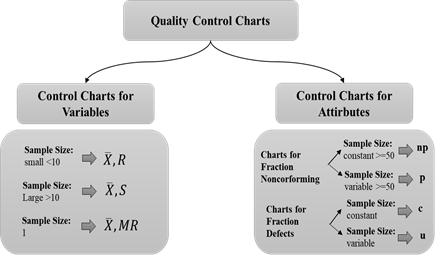


In [ ]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

In [ ]:
#Read in example dataset
url = "https://docs.google.com/spreadsheets/d/12c7RftUNjrdLq4IhklKWJgLwa5I4TGZ3/edit?usp=sharing&ouid=108589602591644119588&rtpof=true&sd=true"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data1=pd.read_excel(path)
data1.head()

,X1,X2,X3,X4,X5
0,74.030,74.002,74.019,73.992,74.008
1,73.995,73.992,74.001,74.011,74.004
2,73.988,74.024,74.021,74.005,74.002
3,74.002,73.996,73.993,74.015,74.009
4,73.992,74.007,74.015,73.989,74.014


Piston rings located between the cylinder and the piston constitute important and necessary components that ensure the efficient operation of the automobile engine. In particular, in the manufacture of automobile engine piston rings, the inner diameter of the rings is a critical quality characteristic for rings to be viable. X company, one of the automobile main parts manufacturers, produces the necessary main and side parts of the automobile. The quality characteristics of the products in the manufacturing process have a critical importance. The company prioritizes the quality of the inner diameter of the rings, during the production of piston rings, as it affects the entire subsequent processes. In our case study, we aim to determine the quality characteristics of the inner diameter of the rings during the company's piston ring manufacturing. 37 samples, each consisting of five segments, have been considered for this aim and the standard deviation and average of the process are unknown.  The company is trying to answer following questions: 

*   Is the process in statistical control?
*   What is the standard deviation of the process?
*   What is the process capacity achieved for the piston ring process given that the piston ring is known to be within specification limits 74.000\mp0.05? What percentage of piston rings are manufactured outside of specifications?
*   What are the limits of the process for the 95% confidence level?
*   What are the other relevant analyses used to monitor the adequacy of the process?


In [ ]:
data1.shape

(37, 5)

Since there are 37 samples of size n = 5 and the standards are unknown, the process is controlled by using $\bar{X}$ and $s$ control charts. An unbiased estimator of $\sigma ^2$ is estimated by using the sample variance as given in Eq. (1) for each sample, since $\sigma ^2$ is the unknown variance of a probability distribution.

\\[ s_i^2 = \frac{\sum_{i=1}^{n}{(X_i - \bar{X})^2}}{n-1} ~~~~~~ (1)\\]        

Since the standard deviation of the ith sample is $s_i$ for $m$ preliminary samples, each of size $n$, the standard deviation of the process is calculated as given in Eq. (2).

\\[ \bar{s} = \frac{1}{m} \sum_{i=1}^{m}{s_i} ~~~~~~ (2)\\]


the control chart $s$ for standard deviations is written as Eq. (3).

\\[ UCL = B_4\bar{s} ~~~~~~~~~~ CL = \bar{s} ~~~~~~~~~~ LCL = B_3\bar{s} ~~~~~~ (3)\\]

where UCL, CL, and LCL are upper control limit, center line, and lower control limit, respectively. Then, the control chart $\bar{X}$ for averages is written as in Eq. (4).

\\[ UCL = \overline{\overline{X}} + A_3\bar{s} ~~~~~~~~~~ CL = \overline{\overline{X}} ~~~~~~~~~~ LCL = \overline{\overline{X}} - A_3\bar{s} ~~~~~~ (4)\\]

where $\overline{\overline{X}}$ is the average of the averages:

\\[\overline{\overline{X}} =\frac{1}{m}\sum_{i=1}^{m}{\bar{X}_i} \\]

The constants B3, B4, A3, and  c4 for construction of $\bar{X}$ and $s$ charts from past data are listed in Appendix Table A1 of the textbook chapter for various sample sizes $n$.

In [ ]:
#Calculate characteristic values

data1_new=data1.assign(X_bar=data1.mean(axis=1), S=np.std(data1, 1, ddof=1))
data1_new.head()

,X1,X2,X3,X4,X5,X_bar,S
0,74.030,74.002,74.019,73.992,74.008,74.0102,0.014772
1,73.995,73.992,74.001,74.011,74.004,74.0006,0.007503
2,73.988,74.024,74.021,74.005,74.002,74.0080,0.014748
3,74.002,73.996,73.993,74.015,74.009,74.0030,0.009083
4,73.992,74.007,74.015,73.989,74.014,74.0034,0.012219


In [ ]:
#Calculation and output of the acceptance range for the standard deviations and the mean values

B4=2.089
B3=0
A3=1.427

Sbar=data1_new['S'].mean()
S_upper=B4*Sbar
S_lower=B3*Sbar

Xbarbar=data1_new['X_bar'].mean()
X_upper=Xbarbar+A3*Sbar
X_lower=Xbarbar-A3*Sbar

In [ ]:
#Adding acceptance ranges to data

data1_new.insert(6,'Sbar',Sbar)
data1_new.insert(7,'S_upper',S_upper)
data1_new.insert(8,'S_lower',S_lower)
data1_new.insert(9,'Xbarbar',Xbarbar)
data1_new.insert(10,'X_upper',X_upper)
data1_new.insert(11,'X_lower',X_lower)
data1_new

,X1,X2,X3,X4,X5,X_bar,Sbar,S_upper,S_lower,Xbarbar,X_upper,X_lower,S
0,74.030,74.002,74.019,73.992,74.008,74.0102,0.009465,0.019773,0.0,74.002389,74.015896,73.988882,0.014772
1,73.995,73.992,74.001,74.011,74.004,74.0006,0.009465,0.019773,0.0,74.002389,74.015896,73.988882,0.007503
2,73.988,74.024,74.021,74.005,74.002,74.0080,0.009465,0.019773,0.0,74.002389,74.015896,73.988882,0.014748
3,74.002,73.996,73.993,74.015,74.009,74.0030,0.009465,0.019773,0.0,74.002389,74.015896,73.988882,0.009083
4,73.992,74.007,74.015,73.989,74.014,74.0034,0.009465,0.019773,0.0,74.002389,74.015896,73.988882,0.012219
5,74.009,73.994,73.997,73.985,73.993,73.9956,0.009465,0.019773,0.0,74.002389,74.015896,73.988882,0.008706
6,73.995,74.006,73.994,74.000,74.005,74.0000,0.009465,0.019773,0.0,74.002389,74.015896,73.988882,0.005523
7,73.985,74.003,73.993,74.015,73.988,73.9968,0.009465,0.019773,0.0,74.002389,74.015896,73.988882,0.012256
8,74.008,73.995,74.009,74.005,74.004,74.0042,0.009465,0.019773,0.0,74.002389,74.015896,73.988882,0.005541
9,73.998,74.000,73.990,74.007,73.995,73.9980,0.009465,0.019773,0.0,74.002389,74.015896,73.988882,0.006285


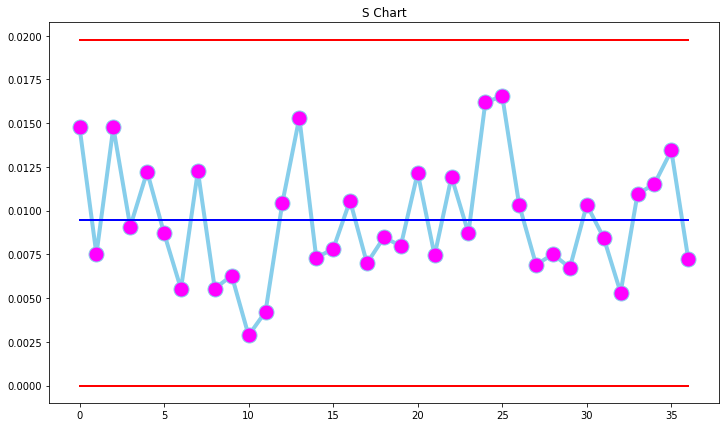

In [ ]:
#Creation of S control chart

plt.figure(figsize=(12,7))
plt.plot(data1_new['S'],marker='o', color='skyblue', lw=4, mfc='magenta', markersize=15)
plt.plot(data1_new['Sbar'],color='b',lw=2)
plt.plot(data1_new['S_upper'],color='r',lw=2)
plt.plot(data1_new['S_lower'],color='r', lw=2)
plt.title('S Chart')
plt.show()

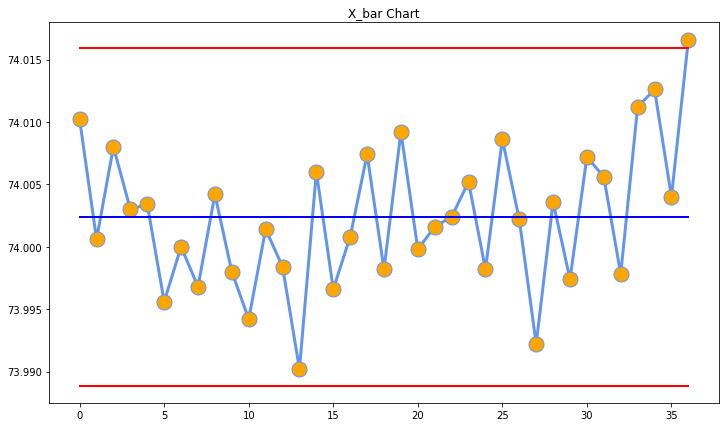

In [ ]:
#Creation of X control chart

plt.figure(figsize=(12,7))
plt.plot(data1_new['X_bar'],marker='o', color='cornflowerblue', lw=3,markersize=15, mfc='orange')
plt.plot(data1_new['Xbarbar'],color='b', lw=2)
plt.plot(data1_new['X_upper'],color='r', lw=2)
plt.plot(data1_new['X_lower'],color='r', lw=2)
plt.title('X_bar Chart')
plt.show()

It is seen that the 37th sample value on the control chart of X bar is outside the control limits. In this case, the 37th sample value is removed from the data set and the control charts are regenerated.

In [ ]:
#Identifying out-of-control points and removing them from the data for S chart

t1=0
s=0
for i in data1_new["S"]:
    if i<S_lower:
      t1=t1+1
      print('sample', s, 'out of lower control limit!')
  
    if i>S_upper:
      t1=t1+1
      print('sample', s, 'out of upper control limit!')
    s=s+1
data1.drop(data1_new[data1_new.S>S_upper].index,inplace=True)
data1.drop(data1_new[data1_new.S<S_lower].index,inplace=True)
print('the number of uncontrolled sample is', t1)

the number of uncontrolled sample is 0


In [ ]:
# renumber the zeroth column index

data1.A=list(range(len(data1.index)))
#for index in range(len(data1.iloc[:,:0])): 
   #for i in data1.iloc[:,:0]:
     #i=index
data1.index=data1.A
data1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,X1,X2,X3,X4,X5
0,74.030,74.002,74.019,73.992,74.008
1,73.995,73.992,74.001,74.011,74.004
2,73.988,74.024,74.021,74.005,74.002
3,74.002,73.996,73.993,74.015,74.009
4,73.992,74.007,74.015,73.989,74.014
5,74.009,73.994,73.997,73.985,73.993
6,73.995,74.006,73.994,74.000,74.005
7,73.985,74.003,73.993,74.015,73.988
8,74.008,73.995,74.009,74.005,74.004
9,73.998,74.000,73.990,74.007,73.995


In [ ]:
#Identifying out-of-control points and removing them from the data for X chart
t2=0
x=0
control=True
for i in data1_new["X_bar"]:
    if i<X_lower:
      t2=t2+1
      print('sample', x, 'out of lower control limit!')
      control=False
    if i>X_upper:
      t2=t2+1
      print('sample', x, 'out of upper control limit!')
      control=False
    x=x+1
data1.drop(data1_new[data1_new.X_bar>X_upper].index,inplace=True)
data1.drop(data1_new[data1_new.X_bar<X_lower].index,inplace=True)
print('out of control sample is', t2)

sample 36 out of upper control limit!
out of control sample is 1


In [ ]:
# renumber the zeroth column index

data1.B=list(range(len(data1.index)))
data1.index=data1.B
data1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,X1,X2,X3,X4,X5
0,74.030,74.002,74.019,73.992,74.008
1,73.995,73.992,74.001,74.011,74.004
2,73.988,74.024,74.021,74.005,74.002
3,74.002,73.996,73.993,74.015,74.009
4,73.992,74.007,74.015,73.989,74.014
5,74.009,73.994,73.997,73.985,73.993
6,73.995,74.006,73.994,74.000,74.005
7,73.985,74.003,73.993,74.015,73.988
8,74.008,73.995,74.009,74.005,74.004
9,73.998,74.000,73.990,74.007,73.995


In [ ]:
#Calculate characteristic values for new data 

data=data1.assign(Xnew_bar=data1.mean(axis=1), Snew=np.std(data1, 1, ddof=1))
data

,X1,X2,X3,X4,X5,Xnew_bar,Snew
0,74.030,74.002,74.019,73.992,74.008,74.0102,0.014772
1,73.995,73.992,74.001,74.011,74.004,74.0006,0.007503
2,73.988,74.024,74.021,74.005,74.002,74.0080,0.014748
3,74.002,73.996,73.993,74.015,74.009,74.0030,0.009083
4,73.992,74.007,74.015,73.989,74.014,74.0034,0.012219
5,74.009,73.994,73.997,73.985,73.993,73.9956,0.008706
6,73.995,74.006,73.994,74.000,74.005,74.0000,0.005523
7,73.985,74.003,73.993,74.015,73.988,73.9968,0.012256
8,74.008,73.995,74.009,74.005,74.004,74.0042,0.005541
9,73.998,74.000,73.990,74.007,73.995,73.9980,0.006285


In [ ]:
#Calculation and output of the acceptance range for the standard deviations and the mean values for new data

B4=2.089
B3=0
A3=1.427

Snew_bar=data['Snew'].mean()
Snew_upper=B4*Snew_bar
Snew_lower=B3*Snew_bar

Xnew_barbar=data['Xnew_bar'].mean()
Xnew_upper=Xnew_barbar+A3*Snew_bar
Xnew_lower=Xnew_barbar-A3*Snew_bar

In [ ]:
#Adding acceptance ranges to new data

data.insert(6,'Snew_bar',Snew_bar)
data.insert(7,'Snew_upper',Snew_upper)
data.insert(8,'Snew_lower',Snew_lower)
data.insert(9,'Xnew_barbar',Xnew_barbar)
data.insert(10,'Xnew_upper',Xnew_upper)
data.insert(11,'Xnew_lower',Xnew_lower)
data

,X1,X2,X3,X4,X5,Xnew_bar,Snew_bar,Snew_upper,Snew_lower,Xnew_barbar,Xnew_upper,Xnew_lower,Snew
0,74.030,74.002,74.019,73.992,74.008,74.0102,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.014772
1,73.995,73.992,74.001,74.011,74.004,74.0006,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.007503
2,73.988,74.024,74.021,74.005,74.002,74.0080,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.014748
3,74.002,73.996,73.993,74.015,74.009,74.0030,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.009083
4,73.992,74.007,74.015,73.989,74.014,74.0034,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.012219
5,74.009,73.994,73.997,73.985,73.993,73.9956,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.008706
6,73.995,74.006,73.994,74.000,74.005,74.0000,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.005523
7,73.985,74.003,73.993,74.015,73.988,73.9968,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.012256
8,74.008,73.995,74.009,74.005,74.004,74.0042,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.005541
9,73.998,74.000,73.990,74.007,73.995,73.9980,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.006285


In [ ]:
#Creation of zones for X control chart on new data 

data['+2s'] =(data['Xnew_upper']-data['Xnew_barbar'])/3*2+data['Xnew_barbar']
data['+1s'] =(data['Xnew_upper']-data['Xnew_barbar'])/3*1+data['Xnew_barbar']
data['-1s'] = data['Xnew_barbar']-(data['Xnew_upper']-data['Xnew_barbar'])/3*1
data['-2s'] = data['Xnew_barbar']- (data['Xnew_upper']-data['Xnew_barbar'])/3*2
data.head()

,X1,X2,X3,X4,X5,Xnew_bar,Snew_bar,Snew_upper,Snew_lower,Xnew_barbar,Xnew_upper,Xnew_lower,Snew,+2s,+1s,-1s,-2s
0,74.030,74.002,74.019,73.992,74.008,74.0102,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.014772,74.011058,74.006526,73.997463,73.992931
1,73.995,73.992,74.001,74.011,74.004,74.0006,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.007503,74.011058,74.006526,73.997463,73.992931
2,73.988,74.024,74.021,74.005,74.002,74.0080,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.014748,74.011058,74.006526,73.997463,73.992931
3,74.002,73.996,73.993,74.015,74.009,74.0030,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.009083,74.011058,74.006526,73.997463,73.992931
4,73.992,74.007,74.015,73.989,74.014,74.0034,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.012219,74.011058,74.006526,73.997463,73.992931


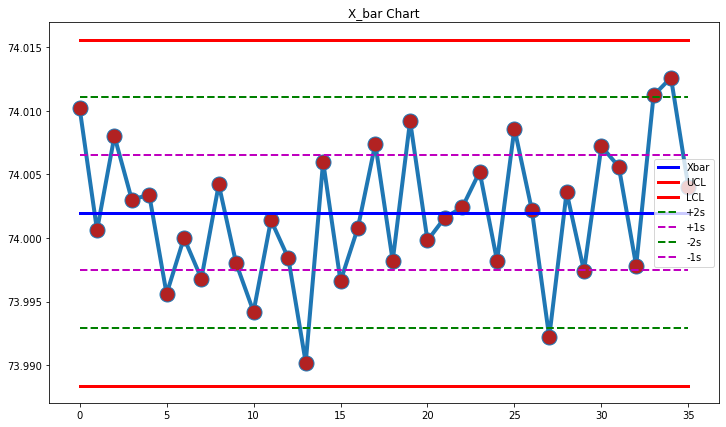

In [ ]:
#Creation of X control chart for new data

plt.figure(figsize=(12,7))
plt.plot(data['Xnew_bar'], marker='o',lw=4, markersize=15, mfc='firebrick')
plt.plot(data['Xnew_barbar'],color='b',label='Xbar',lw=3)
plt.plot(data['Xnew_upper'],color='r', label='UCL',lw=3)
plt.plot(data['Xnew_lower'],color='r', label='LCL',lw=3)
plt.plot(data['+2s'],color='g',linestyle='--',label='+2s',lw=2)
plt.plot(data['+1s'],color='m',linestyle='--',label='+1s',lw=2)
plt.plot(data['-2s'],color='g',linestyle='--',label='-2s',lw=2)
plt.plot(data['-1s'],color='m',linestyle='--',label='-1s',lw=2)
plt.legend()
plt.title('X_bar Chart')
plt.show()

In [ ]:
#Creation of zones for S control chart on new data 

data['+2s'] =(data['Snew_upper']-data['Snew_bar'])/3*2+data['Snew_bar']
data['+1s'] =(data['Snew_upper']-data['Snew_bar'])/3*1+data['Snew_bar']
data['-1s'] = data['Snew_bar']-(data['Snew_upper']-data['Snew_bar'])/3*1
data['-2s'] = data['Snew_bar']- (data['Snew_upper']-data['Snew_bar'])/3*2
data.head()

,X1,X2,X3,X4,X5,Xnew_bar,Snew_bar,Snew_upper,Snew_lower,Xnew_barbar,Xnew_upper,Xnew_lower,Snew,+2s,+1s,-1s,-2s
0,74.030,74.002,74.019,73.992,74.008,74.0102,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.014772,0.016444,0.012986,0.006069,0.002611
1,73.995,73.992,74.001,74.011,74.004,74.0006,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.007503,0.016444,0.012986,0.006069,0.002611
2,73.988,74.024,74.021,74.005,74.002,74.0080,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.014748,0.016444,0.012986,0.006069,0.002611
3,74.002,73.996,73.993,74.015,74.009,74.0030,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.009083,0.016444,0.012986,0.006069,0.002611
4,73.992,74.007,74.015,73.989,74.014,74.0034,0.009527,0.019903,0.0,74.001994,74.01559,73.988399,0.012219,0.016444,0.012986,0.006069,0.002611


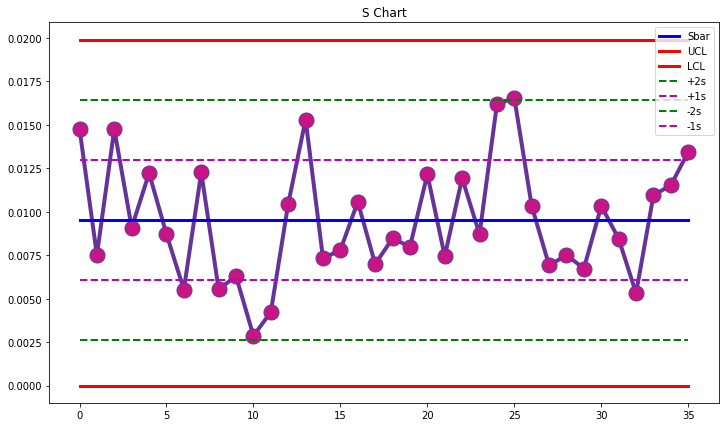

In [ ]:
#Creation of S control chart for new data

plt.figure(figsize=(12,7))
plt.plot(data['Snew'],marker='o',lw=4, color='rebeccapurple', markersize=15, mfc='mediumvioletred')
plt.plot(data['Snew_bar'],color='b', label='Sbar',lw=3)
plt.plot(data['Snew_upper'],color='r',label='UCL',lw=3)
plt.plot(data['Snew_lower'],color='r', label='LCL',lw=3)
plt.plot(data['+2s'],color='g',linestyle='--', label='+2s', lw=2)
plt.plot(data['+1s'],color='m',linestyle='--', label='+1s',lw=2)
plt.plot(data['-2s'],color='g',linestyle='--', label='-2s',lw=2)
plt.plot(data['-1s'],color='m',linestyle='--',label='-1s',lw=2)
plt.legend()
plt.title('S Chart')
plt.show()

As seen in the figures above, none of the samples are out of control in the reconstructed X bar and S control charts.

After investigating the stability of the process using control cards, the capability of the process should be measured using various tools. The process capability ratio (PCR), also called the process capability index, is a statistical measure of process capability used for process improvement efforts. It also indicates the ability of the process to meet specifications or meet customer requirements. Process capability indices allow different processes to be compared based on how well the process is controlled by organizations. A PCR is obtained as in Eq. (5).

\\[ \hat{C}_p = \frac{UCL -LCL}{6s} ~~~~~~ (5)\\]


The $C_{pk}$ index is presented as given in Eq. (6).

\\[ C_{pk} = \min(C_{pu} ,C_{pl}), ~~~~~~ C_{pu} = \frac{UCL - \mu}{3\sigma}, ~~~~~~ C_{pl} = \frac{\mu-LCL}{3\sigma} ~~~~~~ (6)\\]


where $C_{pu}$ and $C_{pl}$ are the process capability criticality ratio for UCL and LCL, respectively. 


In [ ]:
#standard deviation of the process
c4=0.9400
sigma=Snew_bar/c4
sigma

0.010135563943743632

In [ ]:
#Process capability analysis

USL= 74.000+0.05
LSL=74.000-0.05
process_capability = ((USL - LSL) / (6 * sigma))
process_capability_upper = ((USL - Xnew_barbar) / (3 * sigma))
process_capability_lower = ((Xnew_barbar - LSL) / (3 * sigma))
onesided_process_capability=min(process_capability_lower,process_capability_upper)
if process_capability<1: 
  print('Process is unreliable!, Cp:',process_capability)
if 1<process_capability<1.33:
  print('Process is acceptable, Cp:',process_capability)
if process_capability>1.33:
  print('Process is enough, Cp:',process_capability)
if onesided_process_capability<1: 
  print('The process does not produce parts that meet specifications, Cpk:',onesided_process_capability)
if onesided_process_capability==0: 
  print('The mean is equal to the specification limits, Cpk:',onesided_process_capability)
if onesided_process_capability<0: 
  print('The mean is outside of specification limits, Cpk:',onesided_process_capability)
if onesided_process_capability>1: 
  print('The process produces products in accordance with specifications, Cpk:',onesided_process_capability)

print('Cpu:', process_capability_upper)
print('Cpl:', process_capability_lower)



Process is enough, Cp: 1.6443748723970641
The process produces products in accordance with specifications, Cpk: 1.578782585820181
Cpu: 1.578782585820181
Cpl: 1.7099671589739474


The standard deviation of the process according to new values is obtained as 0.01. According to the 74.000-0.05 and 74.000+0.05 specification limits, the process capability Cp is found as 1.64. The Cp value greater than 1 indicates that the process is sufficient and reliable. 

The Cp index is only a measure of the process spread and it does not consider whether or not the process mean conforms with the specifications. To test the proximity of process mean and the specified value, the Cpk index is use. To obtain the Cpk value, when the lower and upper process capability ratios are calculated first, the upper processing capacity Cpu and the lower processing capacity Cpl are calculated as 1.58 and 1.71, respectively. Since Cpu < Cpl, it is observed that the mean value is closer to LSL. The Cpk value is obtained as 1.58. Looking at the Cpk value, it can be concluded that the process is capable and meets the specification limits as it is greater than 1.33. Since the Cpk value is less than the Cp value, the mean is outside the target value as seen in the Process Capability Analysis Figure below. In addition, the percentage of specification limits used by the process is obtained as 60.81.

In [ ]:
mean=data['Xnew_barbar'][0]
mean

74.00199444444445

In [ ]:
#Determination of characteristics for distribution

from scipy.stats import norm
target=73.985
x = np.linspace(mean-3*sigma, mean+3*sigma, 30)
y = norm.pdf(x, loc=mean, scale=sigma)
#y = np.exp(-(x - mean) ** 2 / (2 * sigma ** 2)) / (math.sqrt(2 * math.pi) * sigma)


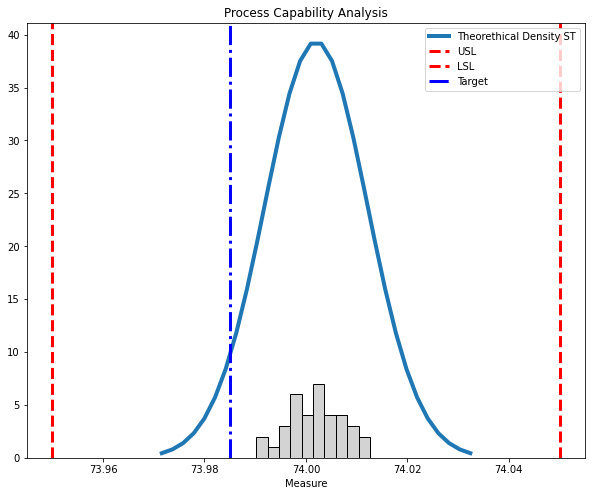

In [ ]:
#Plotting the normal distribution and histogram

plt.figure(figsize=(10,8))
plt.plot(x, y, label="Theorethical Density ST",lw=4)
plt.hist(data['Xnew_bar'], color="lightgrey", edgecolor="black")
plt.axvline(USL, linestyle='--', color="red", label='USL', lw=3)
plt.axvline(LSL, linestyle='--', color="red",label='LSL',lw=3)
plt.axvline(target, linestyle='-.', color="blue", label='Target', lw=3)
plt.legend()
plt.xlabel('Measure')
plt.ylabel('')
plt.savefig('Process Capability.png', bbox_inches='tight')
plt.title('Process Capability Analysis')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Sample Data')

<Figure size 576x576 with 0 Axes>

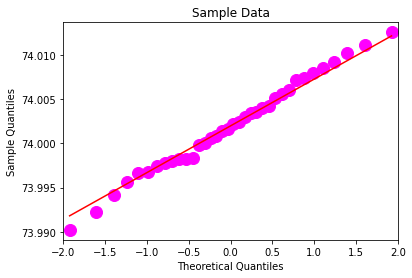

In [ ]:
#Normality test

import statsmodels.api as sm
plt.figure(figsize=(8,8))
sm.qqplot(data['Xnew_bar'], line='s', markersize=12, color='fuchsia', lw=4)
plt.title('Sample Data')

In [ ]:
#Anderson Darling Normality Test

from scipy import stats
n_test=stats.anderson(data['Xnew_bar'], dist='norm')

null_hypothesis_H0='The data comes from a normal distribution'
alternative_hypothesis_H1: 'The data does not come from a normal distribution'

print(n_test)
if n_test[0] > n_test[1][2]:  
        print("The null hypothesis H0 can be rejected at", n_test[2][2],"% significance level")
else:
        print("The null hypothesis H0 cannot be rejected")

AndersonResult(statistic=0.12489162301504564, critical_values=array([0.528, 0.601, 0.721, 0.841, 1.   ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The null hypothesis H0 cannot be rejected


The percentage of the specification band used up by the process is calculated as in Eq. (9).

\\[ P = 100 \times \frac{1}{\hat{C}_p} ~~~~~~ (9)\\]


In [ ]:
#the percentage of the specification band used up by the process

P=(1/process_capability)*100
print('The percentage of specification used by the process:', P)

The percentage of specification used by the process: 60.81338366246525


Confidence intervals need to be established for any alternative to become standard practice in the industrial area, as capability ratios ($C_p$ and $C_{pk}$) are subject to statistical fluctuations. The confidence intervals for PCRs are obtained as given in Eq. (10).

\\[ \hat{C_p} \sqrt{\frac{\chi_{1 - \alpha/2 , n-1}^2}{n-1}} \leq  C_p  \leq \hat{C_p} \sqrt{\frac{\chi_{\alpha/2 , n-1}^2}{n-1}} ~~~~~~ (10)\\]

where $\hat{C_p}$ is calculated as in Eq. (5).

In [ ]:
#Confidence intervals of processes capability 

alpha = 0.05                    # significance level = 5%
n = len(data['Xnew_bar'])       # sample sizes
df = n - 1                      # degrees of freedom

lower = process_capability*(math.sqrt(stats.chi2.ppf(alpha / 2, df))/(n-1))
upper = process_capability*(math.sqrt(stats.chi2.ppf(1 - alpha / 2, df)/(n-1)))
print(lower,'<= Cp <=', upper)

0.21308032598520685 <= Cp <= 2.027385299264839


Although the placement of the process mean is examined with $C_{pk}$,  since healthy results cannot be obtained in some cases, the $C_{pm}$ index should be used instead. The  $C_{pm}$ index is based on the difference between the target value and the process mean and provides more accurate information about the placement of the process mean. The  $C_{pm}$ index is calculated as given in Eq. (11).

\\[C_{pm} = \frac{USL- LSL}{6\sqrt{s^2 + (\overline{X} - T)^2}} ~~~~~~ (11)\\]

where $USL$ and $LSL$ are upper specification limit and lower specification limit respectively. These two values come from the design phase of the product. Also, $\overline{X}$ and $T$ indicate the process's mean value and the target value respectively.

In [ ]:
#Calculating the Cpm index

Cpm=(USL-LSL)/(6*math.sqrt(sigma**2+(mean-target)**2))

if Cpm<1: 
  print('The mean of the process is at a point far from the target value!, Cpm:', Cpm)
if Cpm==1: 
  print('The mean of the process coincides with the target value, Cpm:', Cpm)


The mean of the process is at a point far from the target value!, Cpm: 0.8422872730623098


The Cpm value, which shows the average of the process deviating from the target value, is obtained as 0.842. When the confidence interval of the process is checked, the 95% confidence intervals of the process capacity of the piston ring process have been determined as image.png. 
To check the assumption that the inner diameter measurements are normally distributed, the normal distribution and histogram plot of the piston ring process are generated as in the Figure above. Looking at the histogram graph, it is seen that the data show a distribution similar to the normal distribution. the histogram is completely within the specification limits also indi-cates that the process capability is satisfactory. Anderson-Darling normality test also concluded that there is no evidence to reject the null hypothesis of data being normally distributed.